In [9]:
# Import library yang diperlukan
import urllib.request
import zipfile
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [10]:
def prepare_dataset():
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    local_file = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')
    
    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')
    zip_ref.close()
    
    print("Dataset berhasil diunduh dan diekstrak.")

prepare_dataset()

Dataset berhasil diunduh dan diekstrak.


In [11]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_horses = len(os.listdir(os.path.join(TRAINING_DIR, 'horses')))
train_humans = len(os.listdir(os.path.join(TRAINING_DIR, 'humans')))
val_horses = len(os.listdir(os.path.join(VALIDATION_DIR, 'horses')))
val_humans = len(os.listdir(os.path.join(VALIDATION_DIR, 'humans')))

print(f"Jumlah gambar kuda di training set: {train_horses}")
print(f"Jumlah gambar manusia di training set: {train_humans}")
print(f"Jumlah gambar kuda di validation set: {val_horses}")
print(f"Jumlah gambar manusia di validation set: {val_humans}")

Jumlah gambar kuda di training set: 500
Jumlah gambar manusia di training set: 527
Jumlah gambar kuda di validation set: 128
Jumlah gambar manusia di validation set: 128


In [12]:
# Training data dengan augmentasi untuk menghindari overfitting
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Validation data hanya perlu rescaling
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow gambar dari direktori
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [13]:
def solution_05():
    model = tf.keras.models.Sequential([
        # Input layer - menerima gambar 150x150 dengan 3 channel warna
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        # Tambahkan lebih banyak layer konvolusi untuk ekstraksi fitur
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        # Flatten hasil konvolusi untuk dimasukkan ke layer Dense
        tf.keras.layers.Flatten(),
        
        # Dense layer untuk klasifikasi
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Tambahkan dropout untuk mencegah overfitting
        
        # Output layer - sigmoid untuk klasifikasi biner
        tf.keras.layers.Dense(1, activation='sigmoid')  # DO NOT CHANGE THIS LINE!
    ])
    
    # Compile model
    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    return model

# Buat model
model = solution_05()

# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,667,169 (6.36 MB)

 Trainable params: 1,667,169 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5315 - loss: 0.7223 - val_accuracy: 0.5039 - val_loss: 0.6590
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - accuracy: 0.7379 - loss: 0.5954 - val_accuracy: 0.7422 - val_loss: 0.8635
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 616ms/step - accuracy: 0.8552 - loss: 0.3889 - val_accuracy: 0.8164 - val_loss: 0.7460
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 606ms/step - accuracy: 0.9048 - loss: 0.2611 - val_accuracy: 0.8555 - val_loss: 0.5303
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 601ms/step - accuracy: 0.9281 - loss: 0.1975 - val_accuracy: 0.8477 - val_loss: 0.6351
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 605ms/step - accuracy: 0.9422 - loss: 0.1616 - val_accuracy: 0.7617 - val_loss: 2.0991
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 606ms/step - accuracy: 0.9121 - loss: 0.2570 - val_accuracy: 0.7539 - val_loss: 2.2529
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.9364 - loss: 0.1855 - val_accurac

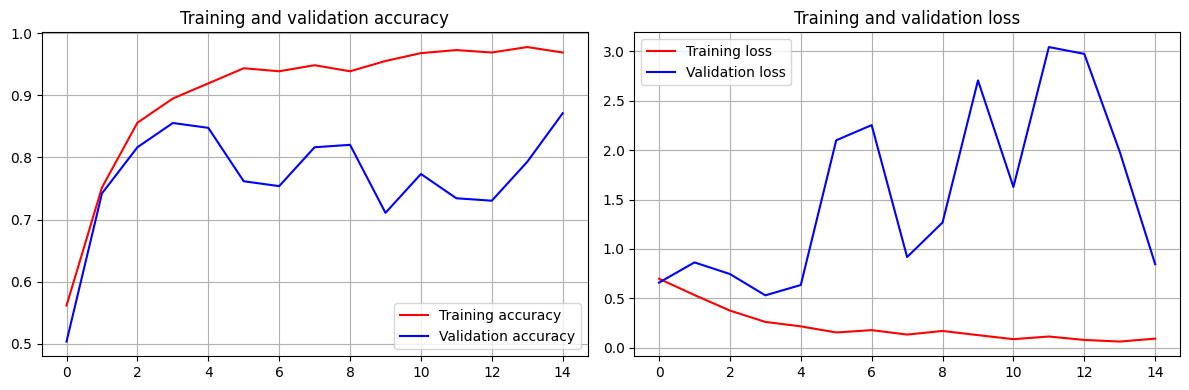

Final training accuracy: 96.88%
Final validation accuracy: 87.11%
Model memenuhi standar akurasi yang ditentukan (>83%)!


In [15]:
# Evaluasi model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Cek apakah akurasi sudah memenuhi standar (>83%)
print(f"Final training accuracy: {acc[-1]*100:.2f}%")
print(f"Final validation accuracy: {val_acc[-1]*100:.2f}%")

if acc[-1] > 0.83 and val_acc[-1] > 0.83:
    print("Model memenuhi standar akurasi yang ditentukan (>83%)!")
else:
    print("Model belum memenuhi standar akurasi yang ditentukan (>83%).")

In [16]:
model.save("model_05.h5")
print("Model berhasil disimpan sebagai 'model_05.h5'")

Model berhasil disimpan sebagai 'model_05.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Path: data/validation-horse-or-human\horses\horse3-011.png
Prediksi: Horse dengan confidence 1.00


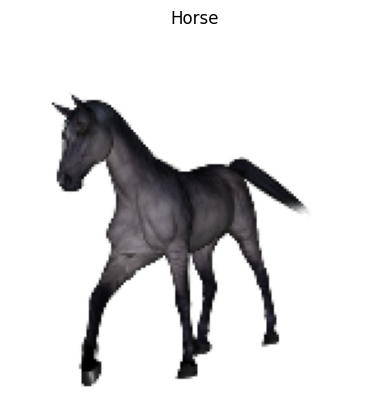

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Path: data/validation-horse-or-human\horses\horse4-439.png
Prediksi: Horse dengan confidence 1.00


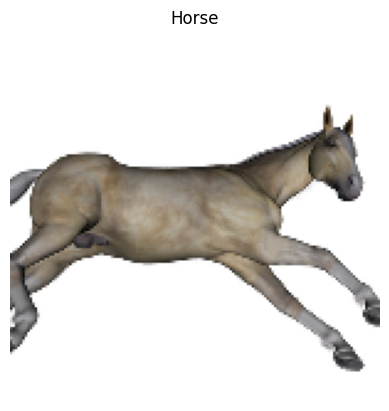

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Path: data/validation-horse-or-human\humans\valhuman01-08.png
Prediksi: Human dengan confidence 1.00


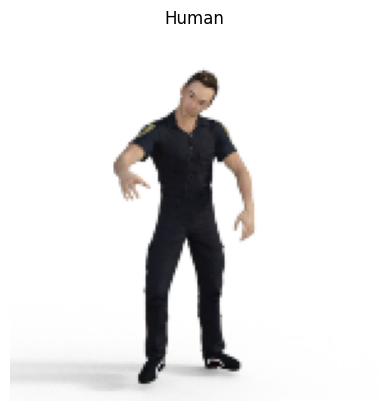

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Path: data/validation-horse-or-human\humans\valhuman04-02.png
Prediksi: Human dengan confidence 1.00


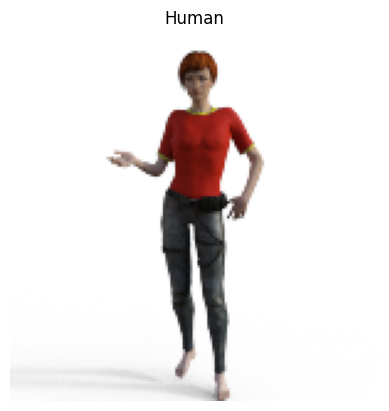

In [ ]:
import random
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0
    
    classes = model.predict(x)
    print(f"Path: {img_path}")
    print(f"Prediksi: {'Human' if classes[0][0] > 0.5 else 'Horse'} dengan confidence {abs(classes[0][0] - 0.5) * 2:.2f}")
    
    plt.imshow(img)
    plt.title(f"{'Human' if classes[0][0] > 0.5 else 'Horse'}")
    plt.axis('off')
    plt.show()

horse_samples = random.sample(os.listdir(os.path.join(VALIDATION_DIR, 'horses')), 2)
human_samples = random.sample(os.listdir(os.path.join(VALIDATION_DIR, 'humans')), 2)

for sample in horse_samples:
    predict_image(os.path.join(VALIDATION_DIR, 'horses', sample))

for sample in human_samples:
    predict_image(os.path.joiSn(VALIDATION_DIR, 'humans', sample))